In [84]:
import numpy as np 
import pandas as pd
import pprint
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.pipeline import Pipeline
import seaborn as sns

In [85]:
# loading Data
df_train= pd.read_csv(r"C:\Users\insre\Downloads\train_ctrUa4K.csv")
df_test= pd.read_csv(r"C:\Users\insre\Downloads\test_lAUu6dG.csv")
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [89]:
df_train_original=df_train.copy()
df_test_original=df_test.copy()

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


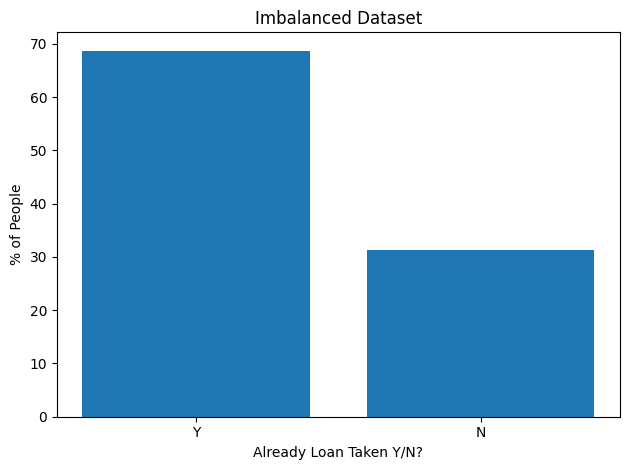

In [90]:
# checking if the dataset is Imbalanced or not 

print(df_train.Loan_Status.value_counts()/df_train.shape[0]*100)
plt.bar(df_train.Loan_Status.value_counts().keys(),df_train.Loan_Status.value_counts()/df_train.shape[0]*100)
plt.xlabel("Already Loan Taken Y/N?")
plt.ylabel("% of People")
plt.title("Imbalanced Dataset")
plt.tight_layout()

In [91]:
#combine Applicant, coapplicant to check jointLoan/independent Loan?
Lst=list(zip(df_train["ApplicantIncome"],df_train["CoapplicantIncome"]))
isJointLoan=[]
for i in Lst:
    if i[1]!=0:
        isJointLoan.append(1)
    else:
        isJointLoan.append(0)
        
df_train["isJointLoan"]=isJointLoan

df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isJointLoan
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0


In [92]:
# Identifying the unique values 
for i in df_train.columns[1:]:
    print("Unique Item for {} = ({}) ".format(i,df_train[i].nunique()))

Unique Item for Gender = (2) 
Unique Item for Married = (2) 
Unique Item for Dependents = (4) 
Unique Item for Education = (2) 
Unique Item for Self_Employed = (2) 
Unique Item for ApplicantIncome = (505) 
Unique Item for CoapplicantIncome = (287) 
Unique Item for LoanAmount = (203) 
Unique Item for Loan_Amount_Term = (10) 
Unique Item for Credit_History = (2) 
Unique Item for Property_Area = (3) 
Unique Item for Loan_Status = (2) 
Unique Item for isJointLoan = (2) 


In [94]:
#create Labels for Gender,Married,Dependents,Education,Self_Emp,Credithistory,isJointLoan

# Replacing Male with value 1 and Female with value 0 and Nan values with the most occuring label among them 

#df_train.Gender.replace({"Male": 1, "Female": 0},inplace=True)
#df_train.Gender.replace({np.nan: df_train.Gender.value_counts().keys()[0]},inplace=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

df_train['Married'] = label_encoder.fit_transform(df_train['Married'])
df_train['Self_Employed'] = label_encoder.fit_transform(df_train['Self_Employed'])
df_train['Education'] = label_encoder.fit_transform(df_train['Education'])
df_train['Property_Area'] = label_encoder.fit_transform(df_train['Property_Area'])
df_train['LoanAmount'] = label_encoder.fit_transform(df_train['LoanAmount'])
df_train['Credit_History'] = label_encoder.fit_transform(df_train['Credit_History'])
df_train['Loan_Status'] = label_encoder.fit_transform(df_train['Loan_Status'])
df_train['Dependents'] = label_encoder.fit_transform(df_train['Dependents'])

# Same as what done for the Gender feature 
# df_train.Married.replace({"Yes": 1, "No": 0},inplace=True)
# df_train.Married.replace({np.nan: df_train.Married.value_counts().keys()[0]},inplace=True)

# df_train.Self_Employed.replace({"Yes": 1, "No": 0},inplace=True)
# df_train.Self_Employed.replace({np.nan: df_train.Self_Employed.value_counts().keys()[0]},inplace=True)

# df_train.Education.replace({"Graduate": 1, "Not Graduate": 0},inplace=True)

# df_train.Property_Area.replace({"Urban": 1, "Rural": 0,"Semiurban":2},inplace=True)

# df_train.LoanAmount.replace({np.nan: df_train.LoanAmount.median()},inplace=True)

# df_train.Credit_History.replace({np.nan:df_train.Credit_History.value_counts().keys()[0]},inplace=True)

# df_train.Loan_Status.replace({"Y":1,"N":0},inplace=True)

# df_train.Dependents.replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)
# df_train.Dependents.replace({np.nan:df_train.Dependents.value_counts()[0]},inplace=True)

# For continous feature replacing the nan value with the median of the feature
df_train.Loan_Amount_Term.replace({np.nan:df_train.Loan_Amount_Term.median()},inplace=True)


df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isJointLoan
0,LP001002,1,0,0,0,0,5849,0.0,203,360.0,1,2,1,0
1,LP001003,1,1,1,0,0,4583,1508.0,81,360.0,1,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,26,360.0,1,2,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,73,360.0,1,2,1,1
4,LP001008,1,0,0,0,0,6000,0.0,94,360.0,1,2,1,0


In [95]:
# No missing values in the dataset so missing value handling is done 
sum(df_train.isnull().sum())

0

In [96]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])

df_test['Married'] = label_encoder.fit_transform(df_test['Married'])
df_test['Self_Employed'] = label_encoder.fit_transform(df_test['Self_Employed'])
df_test['Education'] = label_encoder.fit_transform(df_test['Education'])
df_test['Property_Area'] = label_encoder.fit_transform(df_test['Property_Area'])
df_test['LoanAmount'] = label_encoder.fit_transform(df_test['LoanAmount'])
df_test['Credit_History'] = label_encoder.fit_transform(df_test['Credit_History'])

df_test['Dependents'] = label_encoder.fit_transform(df_test['Dependents'])
df_test.Loan_Amount_Term.replace({np.nan:df_test.Loan_Amount_Term.median()},inplace=True)


In [98]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [99]:
Y=df_train.Loan_Status                                            # Target
df_train.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","isJointLoan"],axis=1,inplace=True)
      # Features
df_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1
610,1,1,3,0,0,1,0,1
611,1,1,1,0,0,1,2,1
612,1,1,2,0,0,1,2,1


In [100]:
df_test=df_test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
df_test=df_test.drop("Loan_ID",axis=1)
df_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,1,0,0,0,1,2
1,1,1,1,0,0,1,2
2,1,1,2,0,0,1,2
3,1,1,2,0,0,2,2
4,1,0,0,1,0,1,2
...,...,...,...,...,...,...,...
362,1,1,3,1,1,1,2
363,1,1,0,0,0,1,2
364,1,0,0,0,0,2,1
365,1,1,0,0,0,1,0


<AxesSubplot: >

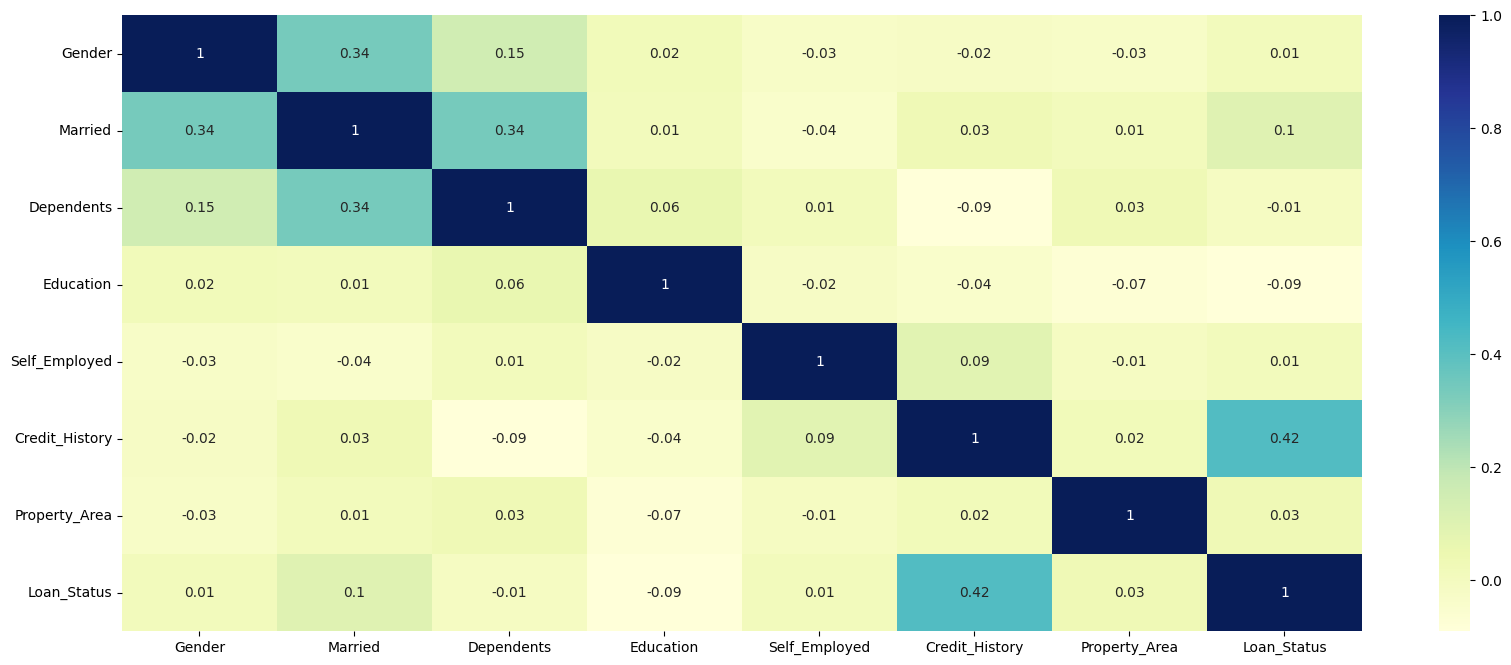

In [101]:
#correlation matrix
corr_matrix = df_train.corr().round(2)
plt.subplots(figsize =(20,8))
sns.heatmap(corr_matrix ,annot= True, cmap = 'YlGnBu')

In [102]:
# Standardizing the training dataset

x= df_train.drop("Loan_Status",1)
y= df_train.Loan_Status
x=pd.get_dummies(x)
df_train=pd.get_dummies(df_train)

C:\Users\insre\AppData\Local\Temp\ipykernel_2696\1269530495.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x= df_train.drop("Loan_Status",1)


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [104]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svm=svc.predict(x_test)
acc_svm=accuracy_score(y_test,pred_svm)*100
acc_svm

83.24324324324324

In [105]:
pred_test=svc.predict(df_test)
loancsv=pd.DataFrame({"Loan_ID":df_test_original["Loan_ID"],"Loan_Status":pred_test})

In [107]:
loancsv

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [108]:
loancsv["Loan_Status"].replace(0,"N",inplace=True)
loancsv["Loan_Status"].replace(1,"Y",inplace=True)

In [ ]:
loancsv.to_csv("submissionfinal.csv")